<a href="https://colab.research.google.com/github/jihoover77/DS-Unit-2-Linear-Models/blob/master/Linear_Regression_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [111]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [112]:
# Read New York City apartment rental listing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Step 1:  Read in file and wrangle data

In [113]:
def wrangle(filepath):
  df = pd.read_csv(filepath,
                   index_col=['created'],
                   parse_dates=['created'],
                   na_filter=[0.0])
  
  # Remove outliers: 
  # the most extreme 1% prices,
  # the most extreme .1% latitudes, &
  # the most extreme .1% longitudes
  df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
          (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
          (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]
  
  # Drop high cardinality features
  df = df.drop(columns=['description'])

  # Drop a duplicate features
  df = df.drop(columns=['street_address'])

  # Create a feature that combines all of the perks
  df['perk_count'] = df[['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
                        'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
                        'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
                        'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
                        'swimming_pool', 'new_construction', 'exclusive', 'terrace', 
                        'loft', 'garden_patio', 'common_outdoor_space', 
                        'wheelchair_access']].sum(axis=1)
  
  # Create a feature column of the total rooms
  df['total_rooms'] = df[['bedrooms', 'bathrooms']].sum(axis=1)

  # Create a feature column from latitude and longitude to get the distance from
  # Manhattan 
  manhattan_lat = 40.7829
  manhattan_lon = -73.9711
  df['distance_from_Manhattan'] = np.sqrt((manhattan_lat - df['latitude'])**2 + 
                                        (manhattan_lon - df['longitude'])**2)
  return df

df = wrangle(DATA_PATH+'apartments/renthop-nyc.csv')

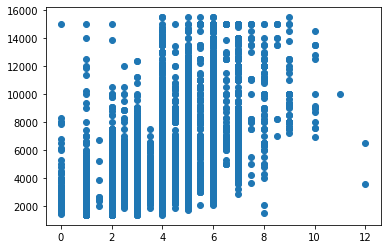

In [114]:
plt.scatter(df['total_rooms'], df['price']);

# Step 2: Split Data

In [115]:
X = df[['total_rooms']]
y = df['price']

# Step 3: Establish Baseline

In [116]:
y_pred = [y.mean()] * len(y)
print('Baseline MAE: ', mean_absolute_error(y, y_pred))

Baseline MAE:  1201.5251847945751


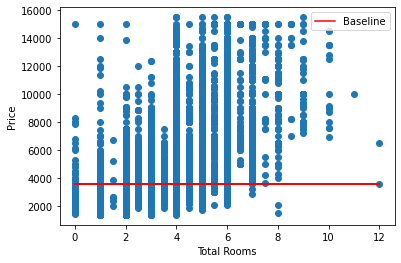

In [117]:
plt.scatter(X, y)
plt.plot(X, y_pred, label='Baseline', color='red')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.legend();

# Step 4: Build Model

In [118]:
# 5-step process from Jake VanderPlas

# Step `1:  Choose a class of model and import from sklearn
# from sklearn.linear_model import Linear Regression

# Step 2:  Instantiate that class
model_lr = LinearRegression()

# Step 3:  Arrange the model into feature(s) matrix and target vector
X = df[['total_rooms']]
y = df['price']

# Step 4: Fit the model to training data
model_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step 5: Check the Metrics

In [119]:
# Step 5:  Apply the model to new data
y_pred = model_lr.predict(X)

print('Linear Regression MAE: ', mean_absolute_error(y, y_pred))

Linear Regression MAE:  899.7852762836384


# Communicate the Results

In [ ]:
#  The model(equation of the best fit line)
print(f'PRICE = {round(model_lr.intercept_)} + {round(model_lr.coef_[0])} * TOTAL ROOMS')

PRICE = 1359 + 811 * TOTAL ROOMS


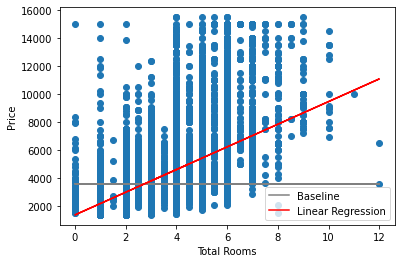

In [121]:
plt.scatter(X, y)
plt.plot(X, [y.mean()] * len(y), label='Baseline', color='grey')
plt.plot(X, y_pred, label='Linear Regression', color='red')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.legend();

# Stretch Goal:  Linear Regression with 2 features

# Select my features and Split the Dataset

In [122]:
target = 'price'
features = ['total_rooms', 'perk_count']

In [123]:
# Instatiate the model
model2_lr = LinearRegression()

# Get the features matrix and target vector
X = df[features]
y = df[target]

# Fit the model
model2_lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# Check the Metrics
y_pred = model2_lr.predict(X)

print('Linear Regression 2 Numeric Features: ', mean_absolute_error(y, y_pred))

Linear Regression 2 Numeric Features:  861.243292188433


In [125]:
# Linear model and the coefficients

intercept = round(model2_lr.intercept_)
coef1 = round(model2_lr.coef_[0])
coef2 = round(model2_lr.coef_[1])

print(f'PRICE = {intercept} + ({coef1} * TOTAL ROOMS) + ({coef2} * PERK TOTAL)')

PRICE = 993 + (768 * TOTAL ROOMS) + (103 * PERK TOTAL)


In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LinearRegression()
)

pipeline.fit(X, y);

In [136]:
print(f'LR for distance from Manhattan:  ${mean_absolute_error(y, model.predict(X)):,.0f}')

LR for distance from Manhattan:  $848


In [137]:
print(f'PRICE = {model.intercept_:,.0f} - ({-model.coef_[0]:,.0f} * LOCATION) + ({model.coef_[1]:,.0f} * ROOMS) + ({model.coef_[2]:,.0f} * perks)')

PRICE = 1,436 - (8,892 * LOCATION) + (775 * ROOMS) + (97 * perks)
